# Vectors Practice

In this chapter we will work with vectors and code Gramm-Schmidt Orthonormalization Algorithm

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import lovely_numpy as ln
import json_tricks



In [39]:
inputs = json_tricks.load('inputs.json')
inputs1 = json_tricks.load('inputs2.json')

answers = {}

In your input you have arrys of shape $N \times 2$, which means that you have 2 vectors both having N coordinates

In [40]:
for one_input in inputs:
    print(one_input)
    print(ln.lovely(one_input['X']))

OrderedDict([('X', array([[1, 2],
       [3, 4]]))])
array[2, 2] i64 n=4 x∈[1, 4] μ=2.500 σ=1.118 [[1, 2], [3, 4]]
OrderedDict([('X', array([[  4,   0],
       [ -3,  -4],
       [  8,   0],
       [  0,  -7],
       [ -3,  -8],
       [ -9,   1],
       [ -5,  -9],
       [-10,   1]]))])
array[8, 2] i64 n=16 x∈[-10, 8] μ=-2.750 σ=4.969
OrderedDict([('X', array([[-7,  3],
       [ 5,  4],
       [-3,  3]]))])
array[3, 2] i64 n=6 x∈[-7, 5] μ=0.833 σ=4.337 [[-7, 3], [5, 4], [-3, 3]]
OrderedDict([('X', array([[ -4,  -2],
       [-10,   1]]))])
array[2, 2] i64 n=4 x∈[-10, 1] μ=-3.750 σ=4.023 [[-4, -2], [-10, 1]]
OrderedDict([('X', array([[ -8, -10],
       [ -6,  -1],
       [ -4,  -2],
       [ -4,  -2],
       [ -3,   1],
       [ -9, -10],
       [  5,  -6],
       [ -8,   1],
       [ -3,  -8]]))])
array[9, 2] i64 n=18 x∈[-10, 5] μ=-4.278 σ=4.093
OrderedDict([('X', array([[  0,  -4],
       [-10, -10],
       [  9,   2],
       [ -2,  -8],
       [ -4,  -5],
       [ -3,  -2],
       [

# Task 1. Vector lenghts

- Write a function that calculates vector lengths, answer should return array of shape $2$
- Apply this function to all the inputs

In [41]:
def get_lengths(X):
    res = None
    res = np.sqrt(X[0]** 2 + X[1] ** 2)
    return res

In [42]:
answers['lengths'] = [
    get_lengths(**inp) for inp in inputs
]

# Task 2. Vector directions

- Write a function that calculates vector directions. Result should be of the same shape as the original array X
- Use $10^{-8}$ addition in division to avoid division by zero
- Apply this function to all arrays in the inputs

In [53]:
def get_directions(X):
    res = None
    res = np.arctan2(X[1], X[0] + 1e-8)  #we add 1e-10 to avoid division by zero
    return res

In [44]:
answers['directions'] = [
    get_directions(**inp) for inp in inputs
]

# Step 3. Visualization

We will visualize vectors and directions using `matplotlib` 

(np.int64(0), np.int64(0)) (np.int64(0), np.int64(0)) (np.int64(1), np.int64(2)) (np.int64(3), np.int64(4))
(np.float64(0.0), np.float64(0.0)) (np.float64(0.0), np.float64(0.0)) (np.float64(0.6324555320905969), np.float64(0.8944271910356931)) (np.float64(1.8973665960820538), np.float64(1.7888543819819431))


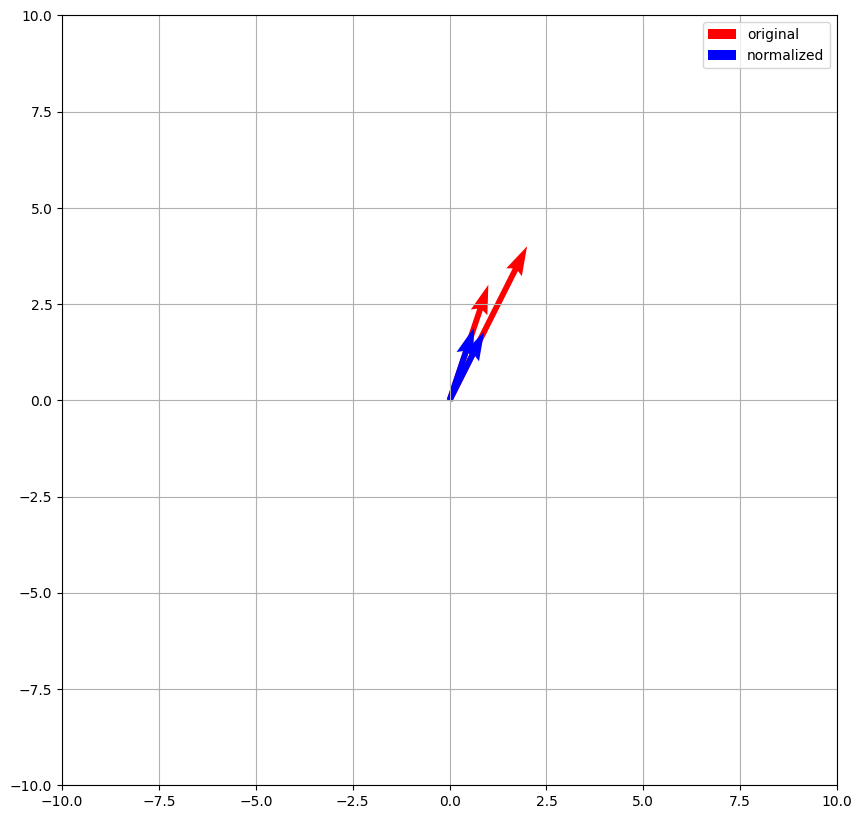

In [45]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
ax = plt.gca()
X = inputs[0]['X']
vecs = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*vecs)

print(X, Y, U, V)

ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'red')

X = answers['directions'][0]
#conveet angle to unit vectors
U = np.cos(X) * 2
V = np.sin(X) * 2
origins = np.zeros_like(U)
norms = np.stack([origins, origins, U, V], axis=1)
X, Y, U, V = zip(*norms)

print(X, Y, U, V)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'blue')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.draw()
plt.grid()
plt.legend(['original', 'normalized'])
plt.show()


# Task 4. Scalar Product

Write a function that calculates
- cosine distance between the vectors
- use $10^{-8}$ additional constant in the denominator for the sake of numerical stability

In [46]:
def get_cosine(X):
    res = None
    ## YOUR CODE HERE
    return res

In [47]:
answers['cosine'] = [
    get_cosine(**inp) for inp in inputs
]

In [48]:
print(answers['cosine'][0])

None


# Task 5. Orthonormalization

Create a pair of orthonormal vectors
- Take the first vector and normalize it
- Take the second vector, remove the collinear component to the first one
- Normalize it

In [49]:

def get_orthonormal(X):
    res = X.copy().astype('float32')
    ## YOUR CODE HERE
    return res

In [50]:
answers['orthonormal'] = [
    get_orthonormal(**inp) for inp in inputs
]

# 6. Visualization

[[1 2]
 [3 4]]
[[1. 2.]
 [3. 4.]]


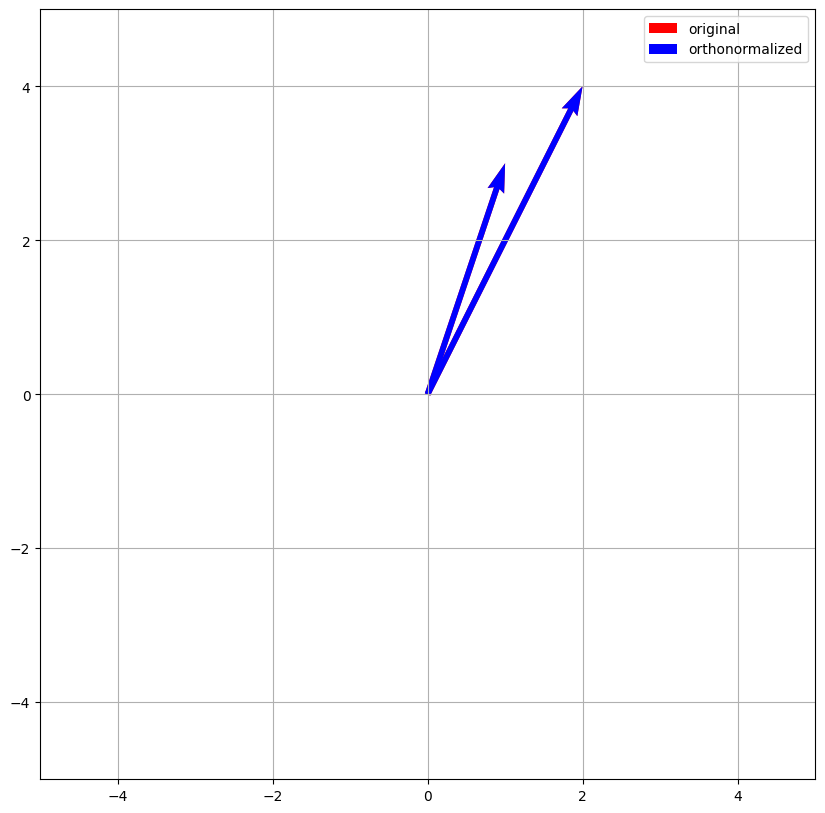

In [51]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
ax = plt.gca()
X = inputs[0]['X']
print(X)
vecs = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*vecs)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'red')

X = answers['orthonormal'][0]
print(X)
norms = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*norms)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'blue')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
plt.draw()
plt.grid()
plt.legend(['original', 'orthonormalized'])
plt.show()


# 7. Saving the answer

In [52]:
json_tricks.dump(answers, '.answer.json')

'{"lengths": [{"__ndarray__": [3.1622776601683795, 4.47213595499958], "dtype": "float64", "shape": [2]}, {"__ndarray__": [5.0, 4.0], "dtype": "float64", "shape": [2]}, {"__ndarray__": [8.602325267042627, 5.0], "dtype": "float64", "shape": [2]}, {"__ndarray__": [10.770329614269007, 2.23606797749979], "dtype": "float64", "shape": [2]}, {"__ndarray__": [10.0, 10.04987562112089], "dtype": "float64", "shape": [2]}, {"__ndarray__": [10.0, 10.770329614269007], "dtype": "float64", "shape": [2]}, {"__ndarray__": [13.45362404707371, 3.605551275463989], "dtype": "float64", "shape": [2]}, {"__ndarray__": [12.041594578792296, 14.142135623730951], "dtype": "float64", "shape": [2]}, {"__ndarray__": [9.219544457292887, 8.602325267042627], "dtype": "float64", "shape": [2]}, {"__ndarray__": [7.0, 7.280109889280518], "dtype": "float64", "shape": [2]}, {"__ndarray__": [9.433981132056603, 6.324555320336759], "dtype": "float64", "shape": [2]}, {"__ndarray__": [3.605551275463989, 11.180339887498949], "dtype"